# Logistic Regression Sentiment Analysis - Shopee Review
This notebook performs sentiment analysis using Logistic Regression on Shopee review data.

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# --- Download stopwords Indonesia (cukup sekali) ---
nltk.download('stopwords')
stop_words_ind = stopwords.words('indonesian')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# --- Preprocessing function ---
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # Hapus simbol dan angka
    text = re.sub(r'\s+', ' ', text).strip()     # Hapus spasi ganda
    return text


In [4]:
# --- Load data ---
df = pd.read_csv("../scraping-result/shopee_ratingnew.csv")
df.head(10)

,Username,Produk,Review,Rating,Waktu transaksi
0,michelladev,SKIN1004 Madagascar Centella Hyalu-Cica Water-...,NaN,5,2025-05-31 13:38
1,sovimamun,SKIN1004 Madagascar Centella Poremizing Tinte...,"Pengirimannya cepet, adminnya ramah pwoll, pac...",5,2025-05-31 13:36
2,_6smerv2sm,SKIN1004 Madagascar Centella Light Cleansing O...,NaN,5,2025-05-31 13:33
3,_6smerv2sm,SKIN1004 Madagascar Centella Light Cleansing O...,NaN,5,2025-05-31 13:33
4,amamiyuu,SKIN1004 Magadascar Centella Probio-Cica Enric...,NaN,5,2025-05-31 13:33
5,amamiyuu,SKIN1004 Magadascar Centella Probio-Cica Essen...,NaN,5,2025-05-31 13:33
6,amamiyuu,SKIN1004 Madagascar Centella Light Cleansing O...,NaN,5,2025-05-31 13:33
7,amamiyuu,SKIN1004 Madagascar Centella Quick Calming Pad...,NaN,5,2025-05-31 13:33
8,amamiyuu,SKIN1004 Madagascar Centella Light Cleansing O...,NaN,5,2025-05-31 13:33
9,sechanthariqauliansyach,SKIN1004 [Centella Duo Cleanser Set] Cleansing...,NaN,5,2025-05-31 13:32


In [5]:
df.dropna(subset=["Review", "Rating"], inplace=True)

In [6]:
# --- Labeling: Rating >= 4 = Positif (1), < 4 = Negatif (0) ---
df["Label"] = df["Rating"].apply(lambda x: 1 if x >= 4 else 0)

# --- Preprocessing text ---
df["CleanReview"] = df["Review"].apply(clean_text)

In [7]:
# --- TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(stop_words=stop_words_ind)
X = vectorizer.fit_transform(df["CleanReview"])
y = df["Label"]

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


d:\shopee\venv\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [8]:
# --- Logistic Regression model ---
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [9]:
# --- Evaluation ---
y_pred = model.predict(X_test)
print("📊 Hasil Evaluasi Model Logistic Regression:")
print(classification_report(y_test, y_pred, zero_division=0))


📊 Hasil Evaluasi Model Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.98      0.97      0.97       239

    accuracy                           0.95       274
   macro avg       0.88      0.91      0.90       274
weighted avg       0.95      0.95      0.95       274



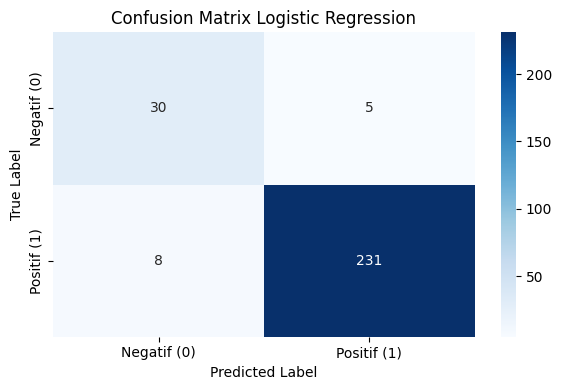

In [10]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
labels = ['Negatif (0)', 'Positif (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Logistic Regression')
plt.tight_layout()
plt.show()
